**GDP ANALYSIS**

The dataset we consider for each country as data point(227 countries in total),and for each, we have 20 colums, each columns represents a different aspect or measure of the specific country. 

The goal of project is to train a model that can predict GDP per captia for each country.
  

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


Data Import

In [7]:
data = pd.read_csv('world.csv')


To identify Nulls in our dataset

In [8]:
data.head(5)

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06                             163,07               700.0   
1         -4,93                              21,52              4500.0   
2         -0,39                                 31              6000.0   
3        -20,71                               9,27              8000.0   
4           6,6                               4,05             19000.0   

  Literacy (%) Phones (per 1000) Arable (%) Crops (%) Other (%) Climate  \
0         36,0               3,2      12,13      0,22     87,65       1   
1         86,5              71,2      21,09      4,42     74,49       3   
2         70,0              78,1       3,22      0,25     96,53       1   
3         97,0             259,5         10        15        75       2   
4        100,0             497,2       2,22         0     97,78       3   

  Birthrate Deathrate Agriculture Industry Service  
0      46,6     20,34        0,38     0,24    0,38  
1     15,11      5,22       0,232    0,188   0,579  
2     17,14      4,61       0,101      0,6   0,298  
3     22,46      3,27         NaN      NaN     NaN  
4      8,71      6,25         NaN      NaN     NaN

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

The issuse that we face here is expect for country and region all other columns are numerical at only pollution, area, GDP are float type. While the rest are idetified as the object type.So we need to convert those into float type to continue our data analysis. 

Fix Columns Name

Many columns in dataset have long names , we are changing them into shorter ,for better discript.

In [10]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita","literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
"service"])

Fix datatype

Here we are fixing columns that have object type to float/string.

In [11]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)
data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)           

Lets check our new data types and columns.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

Show the statical analysis of dataset.

  Here we observers the min, max, mean, std and count of each column in dataset. 

In [13]:
data.describe()

population          area       density  coastline_area_ratio  \
count  2.270000e+02  2.270000e+02    227.000000            227.000000   
mean   2.874028e+07  5.982270e+05    379.047137             21.165330   
std    1.178913e+08  1.790282e+06   1660.185825             72.286863   
min    7.026000e+03  2.000000e+00      0.000000              0.000000   
25%    4.376240e+05  4.647500e+03     29.150000              0.100000   
50%    4.786994e+06  8.660000e+04     78.800000              0.730000   
75%    1.749777e+07  4.418110e+05    190.150000             10.345000   
max    1.313974e+09  1.707520e+07  16271.500000            870.660000   

       net_migration  infant_mortality  gdp_per_capita    literacy  \
count     224.000000        224.000000      226.000000  209.000000   
mean        0.038125         35.506964     9689.823009   82.838278   
std         4.889269         35.389899    10049.138513   19.722173   
min       -20.990000          2.290000      500.000000   17.600000   
25%        -0.927500          8.150000     1900.000000   70.600000   
50%         0.000000         21.000000     5550.000000   92.500000   
75%         0.997500         55.705000    15700.000000   98.000000   
max        23.060000        191.190000    55100.000000  100.000000   

            phones      arable       crops       other     climate  \
count   223.000000  225.000000  225.000000  225.000000  205.000000   
mean    236.061435   13.797111    4.564222   81.638311    2.139024   
std     227.991829   13.040402    8.361470   16.140835    0.699397   
min       0.200000    0.000000    0.000000   33.330000    1.000000   
25%      37.800000    3.220000    0.190000   71.650000    2.000000   
50%     176.200000   10.420000    1.030000   85.700000    2.000000   
75%     389.650000   20.000000    4.440000   95.440000    3.000000   
max    1035.600000   62.110000   50.680000  100.000000    4.000000   

        birthrate   deathrate  agriculture    industry     service  
count  224.000000  223.000000   212.000000  211.000000  212.000000  
mean    22.114732    9.241345     0.150844    0.282711    0.565283  
std     11.176716    4.990026     0.146798    0.138272    0.165841  
min      7.290000    2.290000     0.000000    0.020000    0.062000  
25%     12.672500    5.910000     0.037750    0.193000    0.429250  
50%     18.790000    7.840000     0.099000    0.272000    0.571000  
75%     29.820000   10.605000     0.221000    0.341000    0.678500  
max     50.730000   29.740000     0.769000    0.906000    0.954000

Show if there are any missing data points.

In [14]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 14.09375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

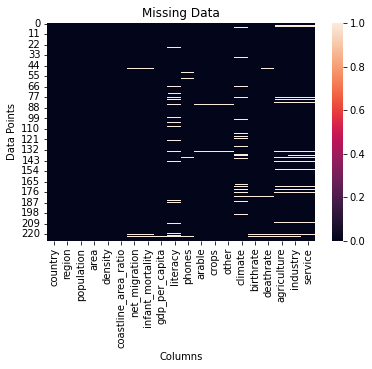

In [15]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

Form the heatmap , we came to know that ,there are some missing data points 

**Data** **Cleaning**


Missing Data





In [16]:
print(data.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


1. net_migration: 3 missing data points. all of them belong to very small nations. We will put zero for those 3.

2. infant_mortality: 3 missing data points. all of them belong to very small nations. We will put zero for those 3.

3. gdp_per_capita: 1 missing value. West Sahara, from internet search, their gdp per capita is $2500, and we will put this value into our data set.

4. literacy: 18 missing values, replaces by the mean literacy of each missing value's region.

5. phones: 4 missing values, replaces by the mean phones of each missing value's region.

6. arable, crops, and other: 2 missing values of very small islands, replace with zero.

7. climate: 22 missing, replace with 0, where zero will represent a 'unknown' value.

8. birthrate, and deathrate: 3 missing, replace with their region's mean rates, since those rates are per 1000, and not population related.

9. agricultue, industry, and service: 15 missing values, all belong to very small island nations. So we will replace the missing values with tthe following: agricultue = 0.15, industry = 0.05. service = 0.8.





In [17]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace= True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

Lets check if any there is any missing data.

In [18]:
print(data.isnull().sum())


country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


**Exploratory** **data** **analysis**


Correlation heatmap


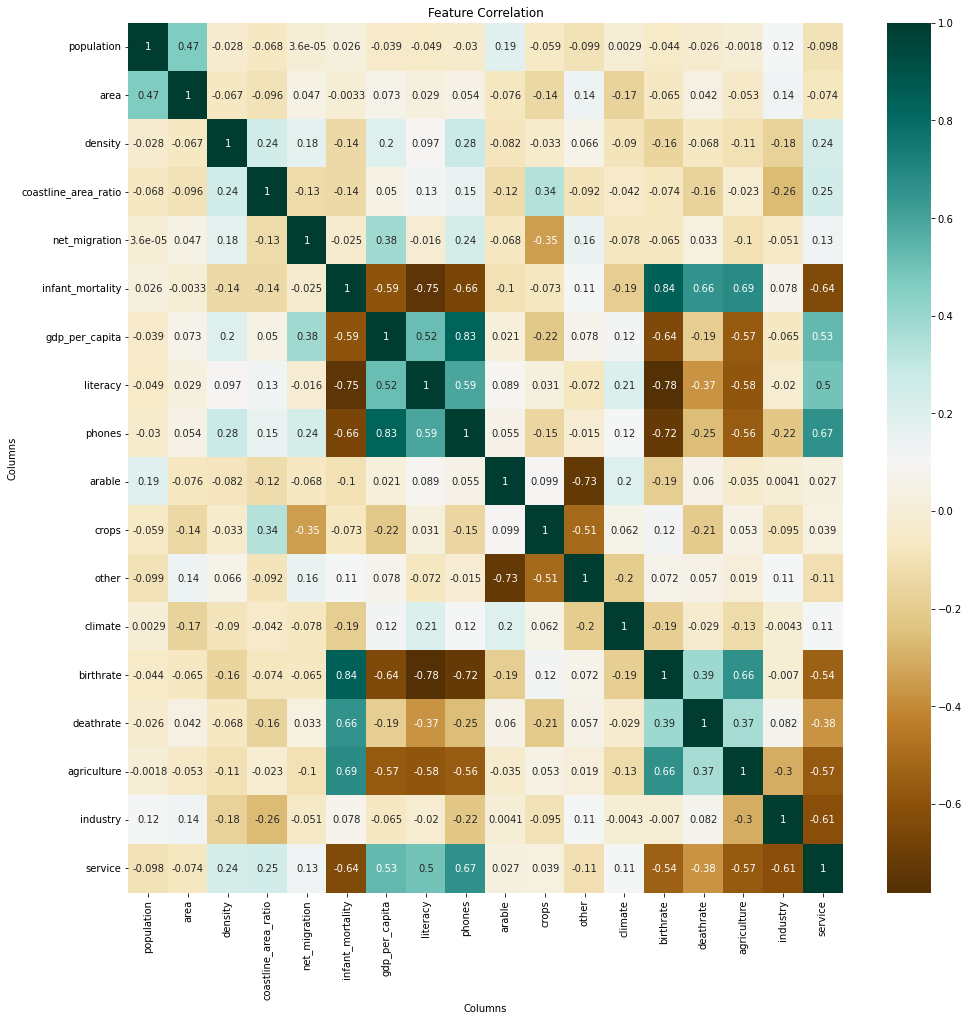

In [19]:
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Some insights from the above correlation heatmap:


expected strong correlation between infant_mortality and birthrate

unexpected strong correlation between infant_mortality and agriculture

expected strong correlation between infant_mortality and literacy

expected strong correlation between gdp_per_capita and phones

expected strong correlation between arable and other (other than crops)

expected strong correlation between birthrate and literacy (the less literacy the higher the birthrate)

unexpected strong correlation between birthrate and phones


let's now show correlation among a few of our features


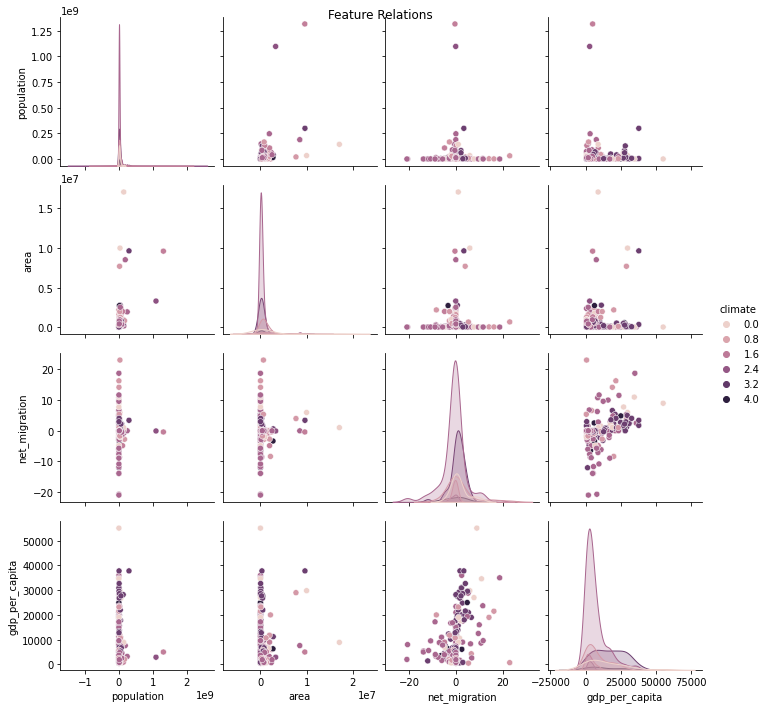

In [20]:
g = sns.pairplot(data[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

We can see a fair correlation between GDP and migration, which makes sense, since migrants tend to move to countries with better opportunities and higher GDP per capita.

**GDP** **Analysis**

The figure below shows the regional ranking according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.

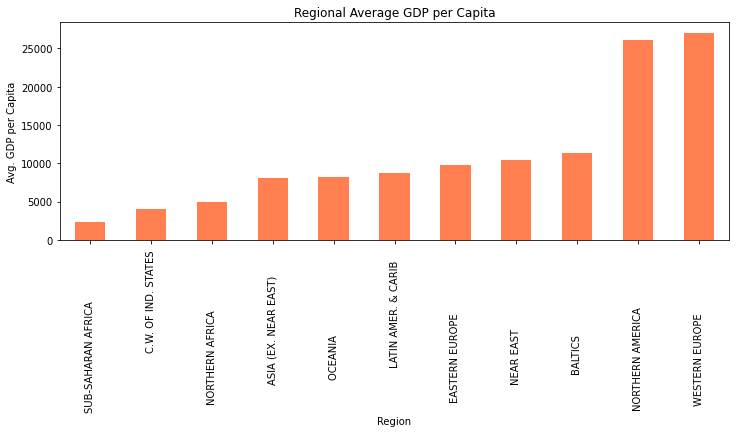

In [21]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()


<Figure size 864x864 with 0 Axes>

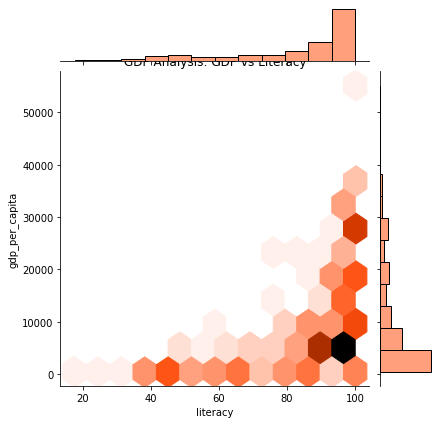

In [22]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'literacy', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.title('GDP Analysis: GDP vs Literacy')
plt.show()

<Figure size 864x864 with 0 Axes>

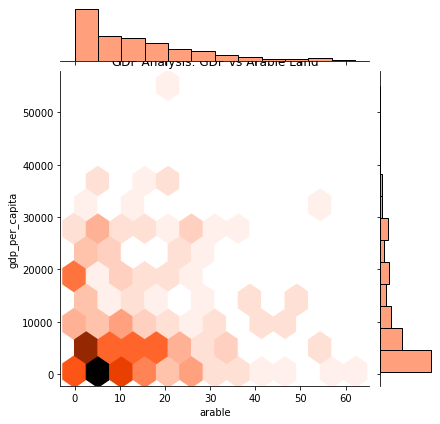

In [23]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'arable', y= 'gdp_per_capita', kind= 'hex', color='coral')
plt.title('GDP Analysis: GDP vs Arable Land')
plt.show()

<Figure size 864x864 with 0 Axes>

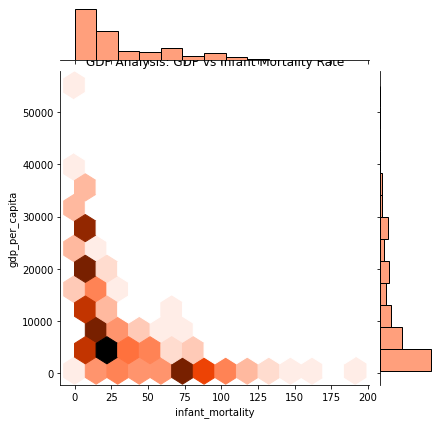

In [25]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.title('GDP Analysis: GDP vs Infant Mortality Rate')
plt.show()